# Finding Roots: Backpropagation in miniature, and self-tying knots.

The KP list shows a non-trivial number of possibilities for the function of many chords.

It is possible to make a quick decision about which (if any) of these possible chord functions shows the most likely harmonic direction.

By comparing the present chord with a previous harmonic state, we can narrow down the *function* of the chord.

The musical result is a fruitful dialogue between the literal monotony of a single note and the chaotic unity of a seven-note mode.

In this way, a chord can be identified in a provisional way, based on recent experience.

---

In [1]:
import numpy as np
import pt_keypattern
import harmony_state
import pt_utils
import pt_musicutils
import pt_naming_conventions
import jupyter_pt_tools as jpt_pt
import IPython.display as ipd

harmony = harmony_state.harmony_state()

# Sorting the KP list - example 1: C# dominant 7

The KP list can be found by comparing a group of notes to the list of possible modes. In this example, the dominant 7, the function is mainly as V (7/10); perhaps IV (2/10), and just maybe as a VI (1/10)


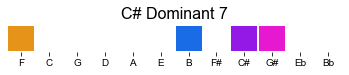

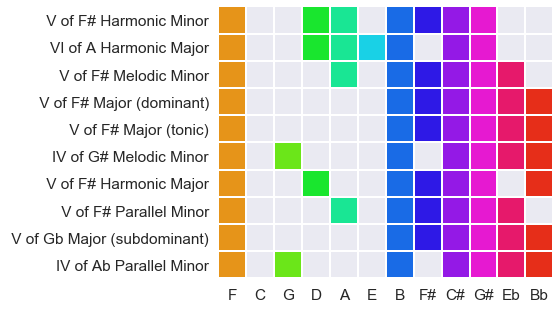

In [2]:
CshM_triad = 0b010001001001
CshM_triad_fifths = pt_utils.c_chrom_to_f_circle(CshM_triad)

harmony.change_notegroup(CshM_triad)

binary_list = [pt_keypattern.get_binary_KP(kpdve[0], kpdve[1]) for kpdve in harmony.current_kpdve_list]
possible_states = [harmony_state.harmony_state(kpdve) for kpdve in harmony.current_kpdve_list]

tonics = [a_state.current_function_string() + " of " + a_state.current_conv_mode_complete() for a_state in possible_states]

jpt_pt.notegroup_heatmap(CshM_triad_fifths, title="C# Dominant 7")

jpt_pt.multiple_notegroup_heatmap(binary_list, yticks=tonics)
patterns = [mode + disp for mode, disp in [pt_musicutils.get_tonic_mode_disp_tuple(kpdve) for kpdve in harmony.current_kpdve_list]]
sequence = jpt_pt.link_ordered_wavestep_sequences(patterns, duration=10)
sequence += jpt_pt.notegroup_wavepile(CshM_triad, duration=10)

ipd.Audio(sequence, rate=44100)

For each of these possibilities we can find a 'KP Number'. The K value represents the shift of seven bits together; the P value represents the distortion of a single scout. In the case above, these numbers are as follows:

In [3]:
[np.array2string(a_state.current_kpdve[:2]) for a_state in possible_states]

['[3 3]',
 '[3 4]',
 '[4 2]',
 '[5 1]',
 '[6 0]',
 '[6 2]',
 '[6 4]',
 '[6 5]',
 '[7 6]',
 '[8 5]']

# Finding 'roots': The advantage of prime numbered scales

We find chords by measuring the *easiest* way to reach them from whatever sounds surround them. 

We do this by considering each note as a possible root in each possible key. The closest key and pattern, reachable in the fewest number of steps, yields the strongest candidate for the chord that functions in our ear. 

To begin with we can check to see if the input chord exists in the current context. If it does, there is no reason to change our sense of what might happened.

So, for example:, a C Major chord can live happily in Ab Harmonic Major, so we may as we can accept it as such.

In [4]:
# get a chord 

When our ears are active and our minds are lazy, we hear harmony.